In [35]:
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from gensim.models import word2vec
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [2]:
from econbooks import GeneralTheroyEmployment
from utilityFunctions import remove_stopwords, clean_sent, word2vec_to_dataframe

In [3]:
general_theory = GeneralTheroyEmployment()

In [4]:
general_theory.author

'John Maynard Keynes'

In [5]:
general_theory.title

'The General Theory of Employment, Interest, and Money'

In [6]:
general_theory_text = general_theory.get_text()

In [7]:
len(general_theory_text)

1229

In [8]:
print(general_theory_text[70])

Thus it is fortunate that the workers, though unconsciously,
are instinctively more reasonable economists than the classical
school, inasmuch as they resist reductions of money-wages, which
are seldom or never of an all-round character, even though the
existing real equivalent of these wages exceeds the marginal
disutility of the existing employment; whereas they do not resist
reductions of real wages, which are associated with increases in
aggregate employment and leave relative money-wages unchanged,
unless the reduction proceeds so far as to threaten a reduction
of the real wage below the marginal disutility of the existing volume of
employment. Every trade union will put up some resistance to a
cut in money-wages, however small. But since no trade union would
dream of striking on every occasion of a rise in the cost of
living, they do not raise the obstacle to any increase in
aggregate employment which is attributed to them by the classical
school. 




In [9]:
sentences = clean_sent(general_theory_text)

In [10]:
print(sentences[70])

['thus', 'fortunate', 'workers', 'though', 'unconsciously', 'instinctively', 'reasonable', 'economists', 'classical', 'school', 'inasmuch', 'resist', 'reductions', 'money', 'wages', 'seldom', 'never', 'round', 'character', 'even', 'though', 'existing', 'real', 'equivalent', 'wages', 'exceeds', 'marginal', 'disutility', 'existing', 'employment', 'whereas', 'resist', 'reductions', 'real', 'wages', 'associated', 'increases', 'aggregate', 'employment', 'leave', 'relative', 'money', 'wages', 'unchanged', 'unless', 'reduction', 'proceeds', 'far', 'threaten', 'reduction', 'real', 'wage', 'marginal', 'disutility', 'existing', 'volume', 'employment', 'every', 'trade', 'union', 'put', 'resistance', 'cut', 'money', 'wages', 'however', 'small', 'since', 'trade', 'union', 'would', 'dream', 'striking', 'every', 'occasion', 'rise', 'cost', 'living', 'raise', 'obstacle', 'increase', 'aggregate', 'employment', 'attributed', 'classical', 'school']


Now we can build the word2vec model

In [11]:
model = word2vec.Word2Vec(size = 150,)

In [12]:
model.build_vocab(sentences)

In [13]:
model.train(sentences, total_examples= model.corpus_count, epochs= 15)

(14103828, 17694495)

In [14]:
model.corpus_count

1229

In [15]:
model.init_sims(replace = True)

In [16]:
model.wv.most_similar("money")

[('interest', 0.3978314995765686),
 ('rate', 0.38111019134521484),
 ('effective', 0.3204095959663391),
 ('cash', 0.3176940083503723),
 ('prices', 0.31039944291114807),
 ('circulation', 0.307037353515625),
 ('response', 0.2925136685371399),
 ('primarily', 0.2892371118068695),
 ('quantity', 0.2851209342479706),
 ('sensitive', 0.2748990058898926)]

In [17]:
model.wv.most_similar("wealth")

[('separation', 0.39465683698654175),
 ('brake', 0.3437894582748413),
 ('generality', 0.33113619685173035),
 ('acceptable', 0.3134344816207886),
 ('illiquid', 0.3059457540512085),
 ('laps', 0.30039942264556885),
 ('ownership', 0.29695573449134827),
 ('growth', 0.292552649974823),
 ('desired', 0.29077479243278503),
 ('owner', 0.28769809007644653)]

In [18]:
model.wv.most_similar("england")

[('1620', 0.5347809791564941),
 ('1663', 0.5195157527923584),
 ('affords', 0.5109505653381348),
 ('i6th', 0.4890357553958893),
 ('hath', 0.4782927334308624),
 ('easier', 0.45804694294929504),
 ('leader', 0.44695398211479187),
 ('dutch', 0.4448501467704773),
 ('confined', 0.43285632133483887),
 ('1844', 0.4277012348175049)]

In [19]:
model.wv.most_similar("smith")

[('adam', 0.9688457250595093),
 ('scotch', 0.7367788553237915),
 ('teaching', 0.621485710144043),
 ('capitals', 0.6199698448181152),
 ('viz', 0.617900013923645),
 ('caution', 0.5752235651016235),
 ('projectors', 0.558677613735199),
 ('hearing', 0.5139753818511963),
 ('sanctions', 0.5076348781585693),
 ('bentham', 0.5043659210205078)]

In [20]:
model.wv.most_similar("investment")

[('rate', 0.38673722743988037),
 ('interest', 0.3854169249534607),
 ('capital', 0.3465345501899719),
 ('employment', 0.33668258786201477),
 ('efficiency', 0.31497180461883545),
 ('marginal', 0.29822850227355957),
 ('consume', 0.29552161693573),
 ('profitable', 0.28982022404670715),
 ('sufficiently', 0.281266450881958),
 ('consumption', 0.27246981859207153)]

In [21]:
model.wv.most_similar("demand")

[('employment', 0.34404969215393066),
 ('response', 0.3307141065597534),
 ('income', 0.31278252601623535),
 ('effective', 0.31027165055274963),
 ('love', 0.2975562810897827),
 ('eventual', 0.29001107811927795),
 ('every', 0.28614795207977295),
 ('discontinuously', 0.2822186052799225),
 ('stop', 0.28147175908088684),
 ('consumers', 0.2781486511230469)]

In [22]:
tsne = TSNE(n_components= 3)

In [29]:
all_words_vectors = tsne.fit_transform(model.wv.vectors)

In [30]:
# SAVE THE MODEL
import pickle
filename = 'tsne_model.sav'
pickle.dump(all_words_vectors, open(filename, 'wb'))

In [ ]:
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)

In [25]:
model.wv.vectors

array([[ 0.04271969, -0.04754407, -0.04121265, ..., -0.04915918,
        -0.00794453, -0.02896534],
       [-0.0092519 , -0.03863946, -0.04437596, ..., -0.05607514,
        -0.03305539, -0.03107595],
       [ 0.08389762, -0.01427443,  0.00608653, ...,  0.05059804,
        -0.08762602, -0.00818121],
       ...,
       [ 0.03731198,  0.01920916, -0.06906465, ..., -0.00351837,
         0.06829176,  0.09081286],
       [-0.04306705, -0.03400423,  0.02694707, ..., -0.05939651,
        -0.11291827,  0.00503495],
       [ 0.05732647, -0.04895625,  0.06302958, ..., -0.02073851,
        -0.14031282, -0.0582694 ]], dtype=float32)

In [28]:
#model.wv.vocab

In [31]:
df = word2vec_to_dataframe(model, all_words_vectors)

In [32]:
df.head()

,word,x,y
0,general,-52.355453,-27.550587
1,introduction,3.366677,46.388664
2,book,21.984825,11.279318
3,chiefly,7.988635,-8.376116
4,fellow,-28.311401,21.587870


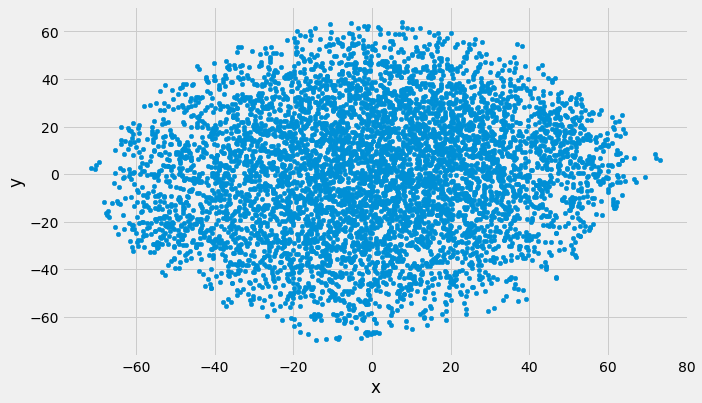

In [37]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 6
plt.style.use("fivethirtyeight")
df.plot.scatter("x", "y")

In [44]:
def plot_region(df, x_bounds, y_bounds):
    slices = df[
        (x_bounds[0] <= df.x) &
        (df.x <= x_bounds[1]) & 
        (y_bounds[0] <= df.y) &
        (df.y <= y_bounds[1])
    ]
    print(slices.shape)
    ax = slices.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slices.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

(96, 3)


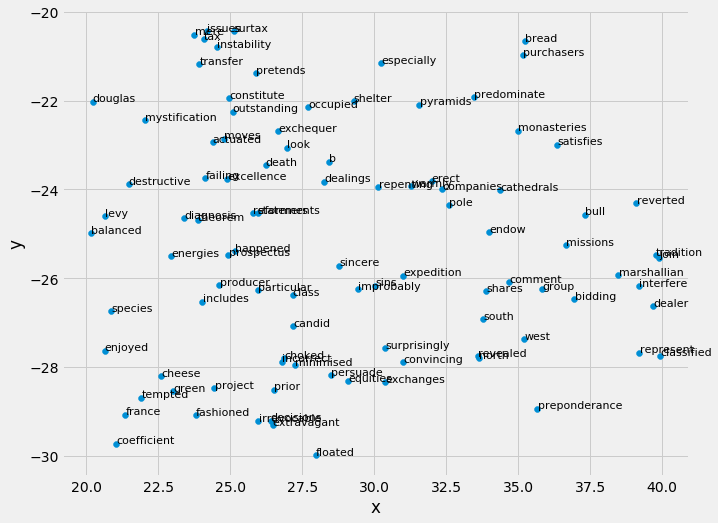

In [48]:
plt.rcParams["figure.figsize"] = 15, 10
plot_region(x_bounds=(20, 40), y_bounds=(-30, -20))